# Langchain V1

In [16]:
import langchain
langchain.__version__

'1.2.0'

In [4]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [8]:
def get_weather(location):
    """Get the weather in a given location"""
    return f"The weather in {location} is sunny"

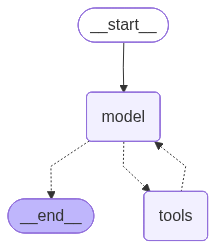

In [9]:
from langchain.agents import create_agent

agent = create_agent(
    model = 'gpt-4o-mini',
    tools = [get_weather],
    system_prompt = 'You are a helpful assistant that can search the web for information.'
    )

agent

In [11]:
response = agent.invoke({"messages": [{"role": "user", "content": "What is the weather in Tokyo?"}]})
response

{'messages': [HumanMessage(content='What is the weather in Tokyo?', additional_kwargs={}, response_metadata={}, id='64fea4cc-e4e5-488a-8ef3-76c859930993'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 65, 'total_tokens': 79, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bbc38b4db', 'id': 'chatcmpl-CtdypTCNPgvawLc2cs9aSn11nA2vI', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019b7fec-6813-7d82-ba93-95ba96dcf076-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'Tokyo'}, 'id': 'call_FylzWbJZmyTX6D1YUGeRUUU9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 65, 'output_tokens': 14, 'tota

In [ ]:
response['messages'][-1].content

'The weather in Tokyo is sunny.'

## Streaming responses

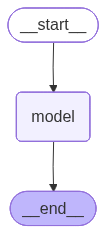

In [18]:
from langchain.agents import create_agent

agent2 = create_agent(
    model = 'gpt-4o-mini',
    system_prompt = 'You are a helpful assistant that can search the web for information.'
    )

agent2

In [22]:
## Streaming responses
streaming_response = agent2.stream({"messages": [{"role": "user", "content": "What is a good restaurant in Tokyo?"}]})
for chunk in streaming_response:
    print(chunk)


{'model': {'messages': [AIMessage(content='Tokyo is known for its incredible dining scene, with options ranging from traditional Japanese cuisine to innovative fusion dishes. Here are a few highly recommended restaurants:\n\n1. **Sukiyabashi Jiro** - Famous for its sushi, this Michelin-starred restaurant is run by chef Jiro Ono and is known for its meticulous attention to detail and high-quality ingredients.\n\n2. **Narisawa** - A two-Michelin-star restaurant offering a creative take on Japanese cuisine with a focus on sustainability. The chef incorporates seasonal ingredients and presents them beautifully.\n\n3. **Ippudo** - Renowned for its ramen, Ippudo has multiple locations in Tokyo. Their tonkotsu ramen is particularly popular and worth trying.\n\n4. **Tempura Kondo** - Specializing in tempura, this restaurant is acclaimed for its light and crispy batter and the quality of its ingredients.\n\n5. **Nakamura** - A traditional kaiseki restaurant where you can experience the full spe

In [24]:


## Batching
batch_response = agent2.batch([
    {"messages": [{"role": "user", "content": "What is a GPU?"}]},
    {"messages": [{"role": "user", "content": "What is a a tomato?"}]}
])
batch_response


[{'messages': [HumanMessage(content='What is a GPU?', additional_kwargs={}, response_metadata={}, id='e0433e7f-f3ef-4a39-b7f0-624f8d874dc0'),
   AIMessage(content='A GPU, or Graphics Processing Unit, is a specialized electronic circuit designed to accelerate the processing of images and videos. It is primarily used in computers to render graphics for games, applications, and videos. GPUs are capable of handling many operations in parallel, which makes them particularly effective for tasks that require simultaneous computations—such as rendering complex graphics or running simulations.\n\nOriginally, GPUs were focused on rendering 2D and 3D graphics, but over time they have evolved to perform a wide variety of calculations beyond graphics, such as deep learning, cryptocurrency mining, and scientific simulations. They consist of hundreds or thousands of smaller cores that can process multiple threads of data simultaneously, contributing to their high performance in parallel processing ta

# Structured output
get model response in a particualr schema

In [27]:
from langchain.chat_models import init_chat_model

chat_model = init_chat_model(model="gpt-4o-mini", model_provider="openai")
chat_model


ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x115a25e00>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x115a24c30>, root_client=<openai.OpenAI object at 0x115a268b0>, root_async_client=<openai.AsyncOpenAI object at 0x115a24fc0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

In [28]:
from pydantic import BaseModel, Field

class Animal(BaseModel):
    name: str = Field(description="The name of the animal")
    age: int = Field(description="The age of the animal")
    sound : str = Field(description="The sound the animal makes")        

In [29]:
model_with_structured_output = chat_model.with_structured_output(Animal)
model_with_structured_output

RunnableBinding(bound=ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x115a25e00>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x115a24c30>, root_client=<openai.OpenAI object at 0x115a268b0>, root_async_client=<openai.AsyncOpenAI object at 0x115a24fc0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True), kwargs={'response_format': <class '__main__.Animal'>, 'ls_structured_output_format': {'kwargs': {'method': 'json_schema', 'strict': None}, 'schema': {'type':

In [31]:
response = model_with_structured_output.invoke('cat')
response

Animal(name='Cat', age=5, sound='Meow')

**Nested structure**

In [35]:
from pydantic import BaseModel, Field

class Ingredient(BaseModel):
    name : str = Field(description='Name of ingredian')
    quantity : float = Field(description='Quantity of items required in kilograms')

class Recipe(BaseModel):
    dish_name : str = Field(description = 'Name of dish')
    origin : str = Field(description= 'Origin of Dish')
    ingrediants : list[Ingredient]
    cost : float | None = Field(None, description = 'Extimated cost to make the dish in inr')


In [36]:
model_with_nested_structure = chat_model.with_structured_output(Recipe)

response = model_with_nested_structure.invoke('How to make a tomato soup ?')
response

Recipe(dish_name='Tomato Soup', origin='Italian Cuisine', ingrediants=[Ingredient(name='Fresh Tomatoes', quantity=1.5), Ingredient(name='Onion', quantity=0.2), Ingredient(name='Garlic Cloves', quantity=0.1), Ingredient(name='Olive Oil', quantity=0.05), Ingredient(name='Vegetable Broth', quantity=0.5), Ingredient(name='Salt', quantity=0.01), Ingredient(name='Black Pepper', quantity=0.005), Ingredient(name='Basil Leaves', quantity=0.02), Ingredient(name='Sugar', quantity=0.005), Ingredient(name='Cream (optional)', quantity=0.1)], cost=150.0)

**TypeDict**

In [ ]:
from typing import TypedDict

class Ingredient(TypedDict):
    name: str  # Name of ingredian
    quantity: float  # Quantity of items required in kilograms

class Recipe(TypedDict):
    dish_name: str  # Name of dish
    origin: str  # Origin of Dish
    ingrediants: list[Ingredient]
    cost: float | None  # Extimated cost to make the dish in inr

model_with_nested_structure = chat_model.with_structured_output(Recipe)

response = model_with_nested_structure.invoke('How to make a tomato soup ?')
response    

{'dish_name': 'Tomato Soup',
 'origin': 'Italian',
 'ingrediants': [{'name': 'Tomatoes', 'quantity': 6},
  {'name': 'Onion', 'quantity': 1},
  {'name': 'Garlic cloves', 'quantity': 2},
  {'name': 'Olive oil', 'quantity': 2},
  {'name': 'Vegetable broth', 'quantity': 2},
  {'name': 'Basil leaves', 'quantity': 1},
  {'name': 'Salt', 'quantity': 1},
  {'name': 'Black pepper', 'quantity': 1}],
 'cost': 5}